## Ejemplo 1: Muriel tiene super percepción

<img src="https://raw.githubusercontent.com/mrivas/disenoExperimentos/master/h1.png" alt="Drawing" style="width: 700px;" />

In [104]:
# Cargar librerias
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy import stats

### Definamos la función para calular el número de posibles selecciones de r elementos de un total de n elementos

<img src="https://raw.githubusercontent.com/mrivas/disenoExperimentos/master/h2.png" alt="Drawing" style="width: 500px;" />

In [105]:
def comb(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

# Por ejemplo el número de combinaciones de 4 tazas generadas a partir de un total de 8 tazas es 
print("Número de combinaciones de 4 tazas")
print(comb(8,4))
# El número de combinaciones de 4 tazas dentro de las cuales Muriel ha adivinado correctamente 1 taza
N,K,n = 8,4,4
k=2
print("Número de combinaciones de 4 tazas en las cuales se ha adivinado 2 taza")
print(comb(K,k)*comb((N-K),(n-k)))

Número de combinaciones de 4 tazas
70.0
Número de combinaciones de 4 tazas en las cuales se ha adivinado 2 taza
36.0


### Ahora calculemos las probabilidades

<img src="https://raw.githubusercontent.com/mrivas/disenoExperimentos/master/h3.png" alt="Drawing" style="width: 500px;" />

In [106]:
# Cuál es la probabilidad de que Muriel obtenga este resultado
seleccionDemuriel=comb(K,k)*comb((N-K),(n-k))
casosTotales = comb(8,4)
probabilidad = seleccionDemuriel / casosTotales
print(probabilidad)

0.5142857142857142


## Para que nos vamos a complicar: Librería de distribución hipergeométrica

In [107]:
rv = stats.hypergeom(N, K, n)
k = np.arange(0, n+1) # Valores de k desde 0 hasta 4
pmf = stats.hypergeom(N, K, n).pmf(k) # Probability mass function
print(pmf)

[0.01428571 0.22857143 0.51428571 0.22857143 0.01428571]


0.014285714285714268


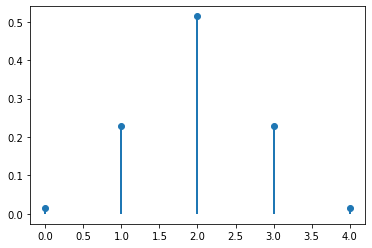

In [108]:
plt.plot(k, pmf, 'o')
plt.vlines(k, 0, pmf, lw=2)

pValue= sum(pmf[4::]) # P-value: Probabilidad de seleccionar al azar 4 tazas
print(pValue)

0.24285714285714263


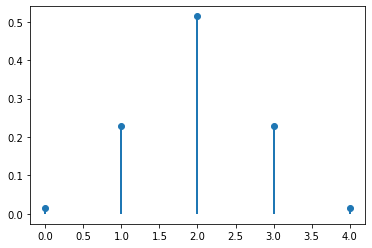

In [100]:
plt.plot(k, pmf, 'o')
plt.vlines(k, 0, pmf, lw=2)

pValue= sum(pmf[3::]) # P-value: Probabilidad de seleccionar al azar 3 tazas
print(pValue)

## Ejercicio

1. Cálcula el número de combinaciones de 4 tazas en las cuales Muriel ha avidinado correctamente 2 tazas
2. Define una función llamda $Muriel(k)$ para hacer lo anterior pero en donde el número de tazas correctamente adviniadas ($k$) es uno de los argumentos de la función.
3. Define una función llamada $Fisher(k)$ para cácular la probabilidad de seleccionar $k$ tazas al azar.

Número de combinaciones de 4 tazas en las cuales se ha adivinado 2 taza
36.0
Número de combinaciones de 4 tazas en las cuales se ha adivinado 1 tazas
16.0
Probabilidad de seleccionar 2 tazas al azar
0.5142857142857142
Probabilidad de seleccionar 2 tazas al azar
[0.01428571 0.22857143 0.51428571 0.22857143 0.01428571]
0.7571428571428571
0.7571428571428571


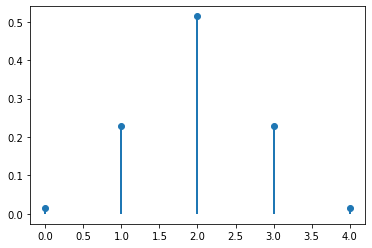

In [133]:
# Ejercicio 1
print("Número de combinaciones de 4 tazas en las cuales se ha adivinado 2 taza")
N,K,n = 8,4,4
k=2
print(comb(K,k)*comb((N-K),(n-k)))

# Ejercicio 2
def Muriel(k):
    N,K,n = 8,4,4
    return(comb(K,k)*comb((N-K),(n-k)))

k=1
print("Número de combinaciones de 4 tazas en las cuales se ha adivinado "+str(k)+" tazas")
print(Muriel(k))    

# Ejericio 3
def Fisher(k):
    seleccionDemuriel=Muriel(k)
    casosTotales = comb(8,4)
    probabilidad = seleccionDemuriel / casosTotales
    print(probabilidad)    
k=2
print("Probabilidad de seleccionar "+str(k)+" tazas al azar")
Fisher(k)

def Fisher2(kk):
    N,K,n = 8,4,4
    rv = stats.hypergeom(N, K, n)
    k = np.arange(0, n+1) # Valores de k desde 0 hasta 4
    pmf = stats.hypergeom(N, K, n).pmf(k) # Probability mass function
    print(pmf)
    plt.plot(k, pmf, 'o')
    plt.vlines(k, 0, pmf, lw=2)

    pValue= sum(pmf[kk::]) # P-value: Probabilidad de seleccionar al azar 4 tazas
    print(pValue)
    return(pValue)
k=2
print("Probabilidad de seleccionar "+str(k)+" tazas al azar")
print(Fisher2(k))

# Ejemplo 2: Marcelo predice el futuro

<img src="https://raw.githubusercontent.com/mrivas/disenoExperimentos/master/h4.png" alt="Drawing" style="width: 500px;" />

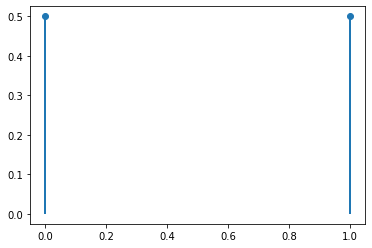

In [139]:
n = 1 # Lanzamiento de 1 moneda
p = 0.5 # La moneda tiene un 50% de caer cara

rv = stats.binom(n,p)
k = np.arange(0, n+1) # Valores de k desde 0 hasta 1
pmf = stats.binom(n,p).pmf(k) # Probability mass function

plt.plot(k, pmf, 'o')
plt.vlines(k, 0, pmf, lw=2)
plt.show()

In [140]:
pValue= sum(pmf[1::]) # P-value: Probabilidad de observar 1 moneda cara, dada que estas caen al azar
print(pValue)

0.5


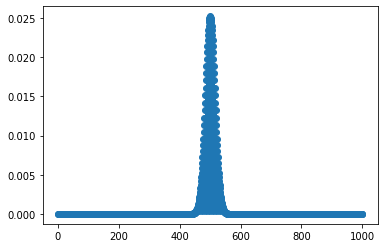

6.70171779001135e-162


In [160]:
n = 1000 # Lanzamiento de 10 moneda
p = 0.5 # La moneda tiene un 50% de caer cara

rv = stats.binom(n,p)
k = np.arange(0, n+1) # Valores de k desde 0 hasta n
pmf = stats.binom(n,p).pmf(k) # Probability mass function

plt.plot(k, pmf,'o')
plt.vlines(k, 0, pmf, lw=1) #lw line width
plt.show()

pValue= sum(pmf[900::]) # P-value: Probabilidad de predecir al azar n monedas
print(pValue)

# Ejemplo 3: Javier verifica que la vacuna funciona

Supongamos que estamos en el año 2025, cuando Javier es el CEO de una empresa biotecnológica. 

Javier quiere producir una vacuna pero no está seguro si ésta es efectiva. 

Él diseño un experimento en donde a un conjunto de voluntarios se les da un placebo y luego se les somete al agente infeccioso, el cual produce fiebre.

Los resultados del grupo placebo muestran que la mayoria de los voluntarios aumentan su temperatura (grados Celsius), mostrando un rango de resultados que se distribuyen de acuerdo a una distribución normal con $\mu=39$, y $\sigma^2=1$

A otro voluntario lo inocula con su vacuna y lo somete al agente infeccioso. La temperatura de este voluntario es de a 37.1 grados Celcius.

¿Es efectiva la vacuna?

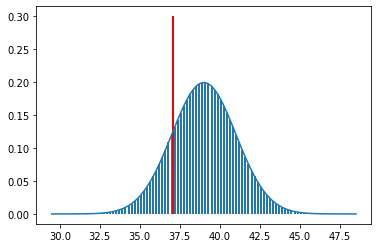

0.171056126308482


In [179]:
u = 39 # Fiebre promedio de los infectados sin vacuna
sd = np.sqrt(4) # Desviación estandar de lso resultados

rv = stats.norm(u,sd)
# Esta es la lista de valores del eje x
k = np.linspace(rv.ppf(0.000001),
                rv.ppf(0.999999), 100) # Percent point function
pdf = rv.pdf(k) # Probability density function

# Este es el gráfico de probabilidaad
plt.plot(k, pdf)
plt.vlines(k, 0, pdf, lw=2)
plt.vlines(37.1, 0, 0.3, color="red",lw=2)
plt.show()


Pvalue=rv.cdf(37.1)
print(Pvalue)